# IBM Coursera Advanced Data Science Capstone - Part 2

## 1.1 Data Schema

Each dataset is contained in a gzipped, tab-separated-values (TSV) formatted file in the UTF-8 character set. The first line in each file contains headers that describe what is in each column. A ‘\N’ is used to denote that a particular field is missing or null for that title/name. 

In this part, we would train all all 25000 reviews for both training and test datasets. The larger the training set in batch size, the higher the accuracy and the lower the cost. This time we use **LSTM Method** for training.

Since we did out major works in Part 1, so we just brief thru Part 2 and just focus on the outcomes of the LSTM-RNN Deep Learning model.

## 1.2 Data Exploration: Simple Descriptive Statistics
We should firstly understand the data characteristics in order to choose or design a suitable algorithm for our own purposes. In the beginning, we are required to import the necessary packages to work with regular expression, algorithms, tensors, Deep Learning networks, Pipelines, Data Preprocessing, Feature Engineering and other more for our designated programming environment. 

## 1.3 Use Case
Sentiment analysis applications:

- Social media monitoring
- Brand monitoring
- Voice of customer (VoC)
- Customer service
- Market research

## 1.4 Extract-Transform-Load (ETL)

We start by importing the required dependencies to preprocess our data and build our model.

This is a dataset of 25,000 movies reviews from IMDB, labeled by sentiment (positive/negative). Reviews have been preprocessed, and each review is encoded as a list of word indexes (integers). For convenience, words are indexed by overall frequency in the dataset, so that for instance the integer "3" encodes the 3rd most frequent word in the data. This allows for quick filtering operations such as: "only consider the top 10,000 most common words, but eliminate the top 20 most common words".

As a convention, "0" does not stand for a specific word, but instead is used to encode any unknown word.

**get_word_index function**

tf.keras.datasets.imdb.get_word_index(path="imdb_word_index.json")

Retrieves a dict mapping words to their index in the IMDB dataset.

**Arguments**

path: where to cache the data (relative to ~/.keras/dataset).

**Returns**

The word index dictionary. Keys are word strings, values are their index.

In [1]:
# Importing libraries
import numpy as np
from keras.datasets import imdb
from keras.preprocessing import sequence

Using TensorFlow backend.


In [2]:
# number of distinct words
vocabulary_size = 10000

# number of words per review
max_review_length = 500

## 1.5 Data Set and Data Exploration

In [3]:
# load Keras IMDB movie reviews dataset
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=vocabulary_size)
print('Number of reviews', len(X_train))
print('Length of first review before padding', len(X_train[0]))
print('First review', X_train[0])
print('First label', y_train[0])

Number of reviews 25000
Length of first review before padding 218
First review [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 

## 1.6 Feature Engineering and Data Preprocessing

In [4]:
# padding reviews
X_train = sequence.pad_sequences(X_train, maxlen=max_review_length)
X_test = sequence.pad_sequences(X_test, maxlen=max_review_length)
print('Length of first review after padding', len(X_train[0]))

Length of first review after padding 500


In [5]:
# A dictionary mapping words to an integer index
word_index = imdb.get_word_index()

In [6]:
# The first indices are reserved
word_index = {k:(v+3) for k,v in word_index.items()}
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2  # unknown
word_index["<UNUSED>"] = 3
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

In [7]:
# display review
def decode_review(text_vec, label):
    return ' '.join([reverse_word_index.get(i, '?') for i in text_vec if i not in [0,1,2,3]]) +  \
           ' --> ' + ('POSITIVE' if label==1 else 'NEGATIVE')

## 1.7 Data Visualization (EDA)

In [8]:
# few examples
print(decode_review(X_test[0], y_test[0]))
print()
print(decode_review(X_test[200], y_test[200]))

please give this one a miss br br and the rest of the cast rendered terrible performances the show is flat flat flat br br i don't know how michael madison could have allowed this one on his plate he almost seemed to know this wasn't going to work out and his performance was quite so all you madison fans give this a miss --> NEGATIVE

don't be fooled this isn't yet another tired example of the girls from outer space pretending to be the french team come to earth to collect as much as possible genre though the synopsis may suggest otherwise this movie is a gem an absolute jewel that has my life from the moment i laid eyes upon it hilarious action packed and stunningly erotic is a euro tour de force a grossly underrated classic br br stop everything you are doing and run out to rent or better yet buy this movie immediately --> POSITIVE


# 2.0 Training our LSTM-RNN Model
We have our Deep Learning model to train in different layers which consist on Sequential, Dense, LSTM and Embedding layers.

In [9]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, SimpleRNN, Flatten
from keras.layers.embeddings import Embedding
from keras.layers.convolutional import Conv1D, MaxPooling1D
import pandas as pd

In [14]:
embedding_dim=50
# Recurrent Neural Network
model_rnn = Sequential()
model_rnn.add(Embedding(vocabulary_size, embedding_dim, input_length=max_review_length))
model_rnn.add(LSTM(100))
model_rnn.add(Dense(1, activation='sigmoid'))
model_rnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history_rnn = model_rnn.fit(X_train, y_train, epochs=3, batch_size=64)
scores_rnn = model_rnn.evaluate(X_test, y_test, verbose=0)

c:\users\wenjia wong\anaconda\envs\mytfenv\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Epoch 1/3
25000/25000 [==============================] - 527s 21ms/step - loss: 0.5396 - accuracy: 0.7322
Epoch 2/3
25000/25000 [==============================] - 552s 22ms/step - loss: 0.3888 - accuracy: 0.8295
Epoch 3/3
25000/25000 [==============================] - 550s 22ms/step - loss: 0.2418 - accuracy: 0.9078


## 2.1 Evaluation of Data

### Q9. What is the accuracy for our RNN model?

In [15]:
df = pd.DataFrame({'Model': ['RNN'],
                   'Accuracy': [str(round(scores_rnn[1]*100, 2)) + '%']})
df

,Model,Accuracy
0,RNN,86.86%


In [30]:
hist = history_rnn.history
print(hist)

{'loss': [0.5395846298027038, 0.3888172708272934, 0.24180458384513856], 'accuracy': [0.73224, 0.82952, 0.90776]}


## 2.2 Exploratory Data Analysis(EDA)

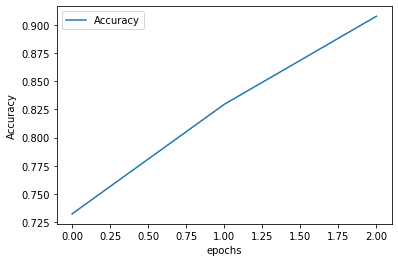

In [31]:
import matplotlib.pyplot as plt
plt.plot(hist["accuracy"],label="Accuracy")
plt.legend()
plt.xlabel("epochs")
plt.ylabel("Accuracy")
plt.show()

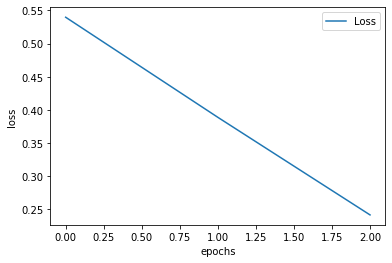

In [33]:
plt.plot(hist["loss"],label="Loss")
plt.legend()
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

In [35]:
model_rnn.evaluate(X_test,y_test)[1]

25000/25000 [==============================] - 105s 4ms/step


0.8685600161552429

In [36]:
model_rnn.evaluate(X_train,y_train)[1]

25000/25000 [==============================] - 102s 4ms/step


0.9390000104904175

In [38]:
output=model_rnn.predict(X_test)
print(output)

[[0.3790162 ]
 [0.99040604]
 [0.18758136]
 ...
 [0.03588277]
 [0.48238707]
 [0.33923522]]


In [39]:
for i in output:
    if i>0.5:
        print("Positive Review")
    else:
        print("Negative Review")

Negative Review
Positive Review
Negative Review
Positive Review
Positive Review
Positive Review
Positive Review
Negative Review
Positive Review
Positive Review
Positive Review
Negative Review
Negative Review
Negative Review
Positive Review
Negative Review
Positive Review
Negative Review
Negative Review
Negative Review
Positive Review
Positive Review
Negative Review
Positive Review
Positive Review
Positive Review
Negative Review
Positive Review
Positive Review
Negative Review
Positive Review
Positive Review
Negative Review
Negative Review
Negative Review
Negative Review
Positive Review
Positive Review
Negative Review
Negative Review
Positive Review
Positive Review
Negative Review
Positive Review
Positive Review
Positive Review
Negative Review
Negative Review
Negative Review
Negative Review
Negative Review
Positive Review
Positive Review
Positive Review
Positive Review
Negative Review
Positive Review
Positive Review
Negative Review
Positive Review
Negative Review
Negative Review
Positive

Negative Review
Positive Review
Positive Review
Positive Review
Negative Review
Positive Review
Positive Review
Negative Review
Negative Review
Negative Review
Positive Review
Positive Review
Negative Review
Positive Review
Negative Review
Negative Review
Negative Review
Negative Review
Negative Review
Positive Review
Negative Review
Negative Review
Positive Review
Negative Review
Negative Review
Negative Review
Positive Review
Negative Review
Positive Review
Negative Review
Negative Review
Negative Review
Positive Review
Negative Review
Negative Review
Negative Review
Positive Review
Positive Review
Positive Review
Positive Review
Negative Review
Negative Review
Negative Review
Negative Review
Negative Review
Negative Review
Positive Review
Negative Review
Negative Review
Negative Review
Positive Review
Negative Review
Positive Review
Negative Review
Negative Review
Positive Review
Negative Review
Positive Review
Negative Review
Negative Review
Positive Review
Positive Review
Positive

Negative Review
Negative Review
Positive Review
Negative Review
Positive Review
Negative Review
Positive Review
Positive Review
Positive Review
Positive Review
Positive Review
Positive Review
Positive Review
Negative Review
Positive Review
Negative Review
Positive Review
Negative Review
Negative Review
Negative Review
Positive Review
Positive Review
Negative Review
Positive Review
Negative Review
Positive Review
Positive Review
Positive Review
Negative Review
Negative Review
Negative Review
Positive Review
Negative Review
Positive Review
Negative Review
Negative Review
Positive Review
Negative Review
Negative Review
Negative Review
Positive Review
Positive Review
Negative Review
Negative Review
Negative Review
Negative Review
Positive Review
Positive Review
Positive Review
Positive Review
Negative Review
Negative Review
Positive Review
Positive Review
Positive Review
Positive Review
Negative Review
Positive Review
Positive Review
Positive Review
Negative Review
Negative Review
Negative

Negative Review
Positive Review
Positive Review
Positive Review
Negative Review
Positive Review
Positive Review
Positive Review
Negative Review
Positive Review
Positive Review
Positive Review
Negative Review
Positive Review
Positive Review
Positive Review
Negative Review
Negative Review
Positive Review
Positive Review
Negative Review
Positive Review
Negative Review
Positive Review
Positive Review
Negative Review
Positive Review
Negative Review
Positive Review
Negative Review
Negative Review
Negative Review
Negative Review
Positive Review
Positive Review
Positive Review
Negative Review
Negative Review
Negative Review
Negative Review
Negative Review
Negative Review
Negative Review
Positive Review
Negative Review
Negative Review
Positive Review
Negative Review
Positive Review
Negative Review
Positive Review
Positive Review
Negative Review
Positive Review
Negative Review
Positive Review
Negative Review
Positive Review
Positive Review
Negative Review
Negative Review
Positive Review
Positive

Positive Review
Negative Review
Positive Review
Positive Review
Positive Review
Negative Review
Negative Review
Negative Review
Positive Review
Negative Review
Positive Review
Negative Review
Negative Review
Negative Review
Positive Review
Negative Review
Negative Review
Positive Review
Negative Review
Positive Review
Positive Review
Positive Review
Negative Review
Positive Review
Positive Review
Negative Review
Positive Review
Positive Review
Positive Review
Positive Review
Negative Review
Positive Review
Negative Review
Positive Review
Negative Review
Positive Review
Positive Review
Negative Review
Negative Review
Negative Review
Positive Review
Positive Review
Negative Review
Positive Review
Positive Review
Positive Review
Positive Review
Positive Review
Negative Review
Positive Review
Negative Review
Negative Review
Positive Review
Positive Review
Positive Review
Negative Review
Positive Review
Negative Review
Negative Review
Positive Review
Positive Review
Positive Review
Positive

Negative Review
Positive Review
Negative Review
Positive Review
Negative Review
Negative Review
Negative Review
Positive Review
Negative Review
Negative Review
Positive Review
Negative Review
Negative Review
Negative Review
Negative Review
Negative Review
Positive Review
Positive Review
Negative Review
Negative Review
Negative Review
Positive Review
Positive Review
Negative Review
Positive Review
Negative Review
Negative Review
Positive Review
Negative Review
Positive Review
Positive Review
Negative Review
Positive Review
Positive Review
Negative Review
Negative Review
Positive Review
Negative Review
Negative Review
Positive Review
Negative Review
Positive Review
Negative Review
Negative Review
Negative Review
Positive Review
Negative Review
Positive Review
Positive Review
Negative Review
Positive Review
Negative Review
Positive Review
Negative Review
Negative Review
Positive Review
Negative Review
Positive Review
Positive Review
Negative Review
Negative Review
Negative Review
Positive

Positive Review
Positive Review
Negative Review
Negative Review
Negative Review
Positive Review
Positive Review
Negative Review
Negative Review
Negative Review
Positive Review
Negative Review
Negative Review
Positive Review
Positive Review
Positive Review
Negative Review
Positive Review
Positive Review
Negative Review
Positive Review
Negative Review
Negative Review
Positive Review
Positive Review
Negative Review
Negative Review
Positive Review
Positive Review
Positive Review
Positive Review
Positive Review
Positive Review
Positive Review
Positive Review
Positive Review
Negative Review
Positive Review
Negative Review
Negative Review
Positive Review
Positive Review
Positive Review
Negative Review
Negative Review
Negative Review
Positive Review
Positive Review
Positive Review
Positive Review
Negative Review
Negative Review
Positive Review
Positive Review
Negative Review
Positive Review
Negative Review
Negative Review
Negative Review
Negative Review
Negative Review
Negative Review
Positive

Positive Review
Positive Review
Negative Review
Positive Review
Negative Review
Positive Review
Positive Review
Negative Review
Positive Review
Positive Review
Positive Review
Negative Review
Positive Review
Negative Review
Positive Review
Positive Review
Negative Review
Positive Review
Positive Review
Positive Review
Positive Review
Negative Review
Negative Review
Positive Review
Positive Review
Negative Review
Positive Review
Negative Review
Negative Review
Negative Review
Negative Review
Positive Review
Positive Review
Negative Review
Positive Review
Positive Review
Positive Review
Positive Review
Positive Review
Positive Review
Negative Review
Positive Review
Negative Review
Positive Review
Positive Review
Negative Review
Negative Review
Negative Review
Negative Review
Negative Review
Positive Review
Negative Review
Positive Review
Positive Review
Negative Review
Positive Review
Negative Review
Positive Review
Positive Review
Negative Review
Negative Review
Positive Review
Positive

Negative Review
Negative Review
Negative Review
Negative Review
Positive Review
Positive Review
Negative Review
Positive Review
Negative Review
Negative Review
Positive Review
Positive Review
Negative Review
Positive Review
Positive Review
Negative Review
Positive Review
Negative Review
Negative Review
Negative Review
Negative Review
Positive Review
Positive Review
Positive Review
Negative Review
Negative Review
Negative Review
Negative Review
Negative Review
Positive Review
Positive Review
Positive Review
Negative Review
Negative Review
Negative Review
Positive Review
Positive Review
Positive Review
Negative Review
Negative Review
Negative Review
Positive Review
Negative Review
Positive Review
Positive Review
Positive Review
Negative Review
Negative Review
Negative Review
Negative Review
Positive Review
Positive Review
Negative Review
Negative Review
Positive Review
Negative Review
Positive Review
Negative Review
Negative Review
Positive Review
Positive Review
Positive Review
Negative

Positive Review
Positive Review
Positive Review
Negative Review
Negative Review
Negative Review
Negative Review
Negative Review
Positive Review
Negative Review
Negative Review
Positive Review
Negative Review
Positive Review
Positive Review
Positive Review
Positive Review
Positive Review
Negative Review
Positive Review
Positive Review
Positive Review
Positive Review
Negative Review
Positive Review
Negative Review
Positive Review
Positive Review
Positive Review
Negative Review
Positive Review
Negative Review
Positive Review
Positive Review
Positive Review
Positive Review
Negative Review
Negative Review
Negative Review
Positive Review
Positive Review
Negative Review
Positive Review
Positive Review
Positive Review
Positive Review
Positive Review
Negative Review
Positive Review
Positive Review
Negative Review
Negative Review
Positive Review
Negative Review
Negative Review
Negative Review
Positive Review
Negative Review
Negative Review
Positive Review
Positive Review
Negative Review
Positive

Negative Review
Positive Review
Negative Review
Negative Review
Positive Review
Positive Review
Negative Review
Positive Review
Negative Review
Positive Review
Positive Review
Positive Review
Positive Review
Negative Review
Negative Review
Positive Review
Negative Review
Positive Review
Positive Review
Negative Review
Positive Review
Negative Review
Positive Review
Positive Review
Negative Review
Negative Review
Negative Review
Positive Review
Negative Review
Positive Review
Negative Review
Positive Review
Negative Review
Negative Review
Negative Review
Positive Review
Positive Review
Positive Review
Negative Review
Positive Review
Negative Review
Negative Review
Negative Review
Negative Review
Positive Review
Negative Review
Positive Review
Positive Review
Negative Review
Positive Review
Positive Review
Positive Review
Negative Review
Positive Review
Positive Review
Negative Review
Positive Review
Positive Review
Negative Review
Negative Review
Positive Review
Negative Review
Negative

Negative Review
Positive Review
Negative Review
Negative Review
Negative Review
Positive Review
Positive Review
Negative Review
Positive Review
Negative Review
Positive Review
Positive Review
Positive Review
Negative Review
Positive Review
Negative Review
Negative Review
Positive Review
Positive Review
Negative Review
Positive Review
Negative Review
Positive Review
Negative Review
Positive Review
Positive Review
Negative Review
Negative Review
Positive Review
Negative Review
Negative Review
Negative Review
Negative Review
Negative Review
Negative Review
Negative Review
Positive Review
Negative Review
Positive Review
Negative Review
Positive Review
Negative Review
Negative Review
Positive Review
Negative Review
Negative Review
Positive Review
Positive Review
Negative Review
Positive Review
Positive Review
Negative Review
Negative Review
Negative Review
Negative Review
Positive Review
Negative Review
Positive Review
Negative Review
Positive Review
Negative Review
Negative Review
Positive

Positive Review
Negative Review
Positive Review
Positive Review
Positive Review
Positive Review
Negative Review
Negative Review
Negative Review
Negative Review
Positive Review
Negative Review
Negative Review
Negative Review
Negative Review
Negative Review
Negative Review
Negative Review
Negative Review
Negative Review
Positive Review
Positive Review
Negative Review
Negative Review
Positive Review
Negative Review
Positive Review
Negative Review
Negative Review
Positive Review
Positive Review
Positive Review
Negative Review
Negative Review
Negative Review
Negative Review
Positive Review
Negative Review
Positive Review
Positive Review
Positive Review
Positive Review
Negative Review
Positive Review
Positive Review
Negative Review
Negative Review
Negative Review
Negative Review
Negative Review
Negative Review
Negative Review
Positive Review
Negative Review
Negative Review
Negative Review
Negative Review
Positive Review
Negative Review
Positive Review
Positive Review
Negative Review
Positive

Positive Review
Negative Review
Positive Review
Positive Review
Positive Review
Positive Review
Negative Review
Negative Review
Negative Review
Positive Review
Positive Review
Positive Review
Negative Review
Positive Review
Negative Review
Negative Review
Positive Review
Negative Review
Negative Review
Negative Review
Negative Review
Negative Review
Negative Review
Negative Review
Positive Review
Negative Review
Negative Review
Negative Review
Positive Review
Positive Review
Positive Review
Positive Review
Negative Review
Positive Review
Positive Review
Positive Review
Negative Review
Positive Review
Negative Review
Positive Review
Negative Review
Negative Review
Positive Review
Negative Review
Negative Review
Positive Review
Negative Review
Negative Review
Positive Review
Positive Review
Positive Review
Negative Review
Positive Review
Positive Review
Positive Review
Negative Review
Negative Review
Positive Review
Positive Review
Positive Review
Negative Review
Positive Review
Positive

Positive Review
Positive Review
Positive Review
Positive Review
Positive Review
Negative Review
Negative Review
Positive Review
Positive Review
Negative Review
Positive Review
Positive Review
Negative Review
Negative Review
Positive Review
Negative Review
Negative Review
Negative Review
Negative Review
Negative Review
Positive Review
Negative Review
Negative Review
Negative Review
Negative Review
Negative Review
Negative Review
Positive Review
Positive Review
Positive Review
Negative Review
Negative Review
Positive Review
Negative Review
Negative Review
Positive Review
Positive Review
Negative Review
Positive Review
Positive Review
Negative Review
Negative Review
Negative Review
Negative Review
Positive Review
Positive Review
Positive Review
Negative Review
Negative Review
Positive Review
Negative Review
Positive Review
Negative Review
Negative Review
Negative Review
Negative Review
Negative Review
Negative Review
Positive Review
Positive Review
Positive Review
Negative Review
Positive

Positive Review
Positive Review
Negative Review
Positive Review
Negative Review
Positive Review
Positive Review
Positive Review
Negative Review
Negative Review
Positive Review
Positive Review
Negative Review
Positive Review
Positive Review
Negative Review
Negative Review
Positive Review
Negative Review
Negative Review
Positive Review
Positive Review
Positive Review
Negative Review
Negative Review
Negative Review
Positive Review
Negative Review
Negative Review
Positive Review
Negative Review
Negative Review
Positive Review
Negative Review
Positive Review
Negative Review
Negative Review
Positive Review
Positive Review
Positive Review
Negative Review
Negative Review
Negative Review
Positive Review
Negative Review
Negative Review
Negative Review
Positive Review
Positive Review
Negative Review
Negative Review
Negative Review
Positive Review
Positive Review
Negative Review
Negative Review
Negative Review
Positive Review
Negative Review
Negative Review
Negative Review
Positive Review
Positive

Positive Review
Positive Review
Negative Review
Negative Review
Positive Review
Negative Review
Positive Review
Positive Review
Negative Review
Negative Review
Positive Review
Positive Review
Positive Review
Positive Review
Positive Review
Positive Review
Negative Review
Positive Review
Positive Review
Positive Review
Negative Review
Negative Review
Positive Review
Negative Review
Positive Review
Negative Review
Positive Review
Negative Review
Negative Review
Negative Review
Positive Review
Negative Review
Negative Review
Negative Review
Positive Review
Positive Review
Negative Review
Positive Review
Positive Review
Positive Review
Positive Review
Positive Review
Negative Review
Negative Review
Positive Review
Positive Review
Negative Review
Positive Review
Negative Review
Positive Review
Negative Review
Negative Review
Negative Review
Positive Review
Negative Review
Negative Review
Positive Review
Positive Review
Positive Review
Positive Review
Positive Review
Negative Review
Negative

In [40]:
print(y_test)

[0 1 1 ... 0 0 0]


# 3.0 Model Deployment on Real Case sentiment forecasting

In [22]:
from keras.preprocessing.text import text_to_word_sequence

def movie_sentiment(reviews, 
                    models=[model_rnn],
                    titles=['RNN']):
    df = pd.DataFrame(columns=['review']+titles)
    i =0
    for review in reviews:
        words = set(text_to_word_sequence(review))
        words = [word_index[w] for w in words]
        words = sequence.pad_sequences([words], maxlen=max_review_length)
        df.loc[i] = [review] + titles
        df.loc[i]['review'] = review
        for j, model in enumerate(models):
            proba = model.predict(words)
            sentiment = '+' if proba>0.5 else '-'
            df.loc[i][titles[j]] = sentiment
        i = i + 1
    return df

In [25]:
text1 = 'I like it'
text2 = 'Such a disgusting movie'
text3 = 'I have no idea on what the movie is about even it already starts on 30 mins'
text4 = 'Such a Boring experience. It is so great that I will never ever watch it again'
movie_sentiment([text1, text2, text3, text4])

,review,RNN
0,I like it,+
1,Such a disgusting movie,-
2,I have no idea on what the movie is about even...,-
3,Such a Boring experience. It is so great that ...,+


# 4.0 Conclusion / Final Result

When we train with larger dataset, even with LSTM-RNN method will gain as much as over 85% of accuracy. The success rate of Model Deployment on real case sentiment forecasting would be 75% (3 out of 4) which is quite good as well. 